<img src="keithleycrop.png" width=700 >

# Python for taking measurements

Advantages of using python for measurements:
- readable code
- easier to modify existing code
- easier to implement control logic (loops, if/then statements, etc)
- don't need to worry about LabVIEW versions

### Jupyter / IPython notebooks

- browser-based interactive python 
- can combine code, plots, formatted text all in one document
- easy to share files (no dependencies)

In [1]:
# required to make plots show up
%matplotlib inline

### python libraries

Most of python's functionality comes from extra libraries that you can include in your own programs. This isn't going to be a general introduction to using python for data analysis; if you want to learn more, some basic tools worth looking into are:

- **matplotlib** - the standard python plotting library

- **pandas** - a really good library for working with tables of data

- **scipy** - lots of premade functions to fit curves, integrate stuff, etc


Here I'm going to talk about two libraries that I made to control instruments that we use:

**keithley** - a module for interfacing with Keithley 2400s

**ppms** - a module for interfacing with the PPMS

The basic syntax for importing libraries is shown below:

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

from IPython import display

In [58]:
# convenience function to make updating plots
def updatingPlot(xs, ys):
    plt.clf()
    plt.plot(xs, ys, 'o-')
    display.display(plt.gcf())
    display.clear_output(wait=True)

## Using the Keithley2400 class

In [6]:
# import the Keithley2400 class
from keithley import Keithley2400, saveToFile

# connect to the keithley
sd_keithley = Keithley2400(23)

# configure the keithley
sd_keithley.setMeasure('current')
sd_keithley.setSourceDC('voltage')
sd_keithley.setCompliance('current', 1E-6)

### Example #1: Measuring an I-V curve

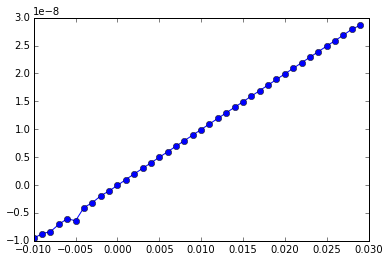

In [23]:
sd_keithley = Keithley2400(23)

# define some parameters
v_min = -10E-3
v_max = 30E-3
v_step = 1E-3

# turn the output on
sd_keithley.outputOn()

for volts in np.arange(v_min, v_max, v_step):

    # set the keithley output, then take a measurement
    sd_keithley.setSourceDC('voltage', volts)
    sd_keithley.measurePoint()

    # do some plotting stuff
    updatingPlot(sd_keithley.data['volts'], sd_keithley.data['amps'])
    
# turn the keithley output off
sd_keithley.outputOff()

### Example #2: Working with collected data

Data from the most recent measurement is stored in the '`data`' attribute of a Keithley2400 variable. Each type of measurement can be accessed by adding `['unit']` after `data`, where `'unit'` is one of volts, amps, or ohms.

In [25]:
print('source-drain resistance data points')
print(sd_keithley.data['ohms'])
print
print('gate voltage data points')
print(gate_keithley.data['volts'])

source-drain resistance data points
[1002560.0, 1005113.0, 1006014.0, 1005753.0, 1006194.0, 1006050.0, 1015177.0, 1005036.0, 1003798.0, 1005425.0, 1006938.0, 1005205.0, 1005968.0, 1006050.0, 1006902.0, 1005820.0, 1005860.0, 1005834.0, 1006127.0, 1006080.0, 1006137.0, 1006060.0, 1005911.0, 1005953.0, 1005921.0, 1006297.0, 1006009.0, 1006173.0, 1005901.0, 1005860.0, 1005712.0, 1005881.0, 1005927.0, 1005978.0, 1006034.0, 1005922.0, 1006075.0, 1005778.0, 1005424.0, 1006035.0]

gate voltage data points
[-2.0, -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]


**Saving to file**
Data can be saved to a file using the `saveToFile` function that is included in the keithley library. The function takes four arguments:

- a list of column headings
- a list of data lists
- a filename
- (optional) a file path, if none is provided it saves to the same directory as the jupyter notebook file

In [26]:
headers = ['gate voltage', 'gate current', 'sd resistance']
data = [gate_keithley.data['volts'], gate_keithley.data['amps'], sd_keithley.data['ohms']]

# save the data to a file
saveToFile(data, headers, 'filename.txt', 'C:/users/hinnefe2/projects/ipython notebooks/groupmeeting/')

### Example #3: Doing a gate sweep

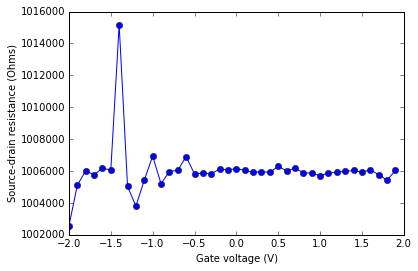

In [24]:
# connect to the keithleys
sd_keithley = Keithley2400(23)
gate_keithley = Keithley2400(24)

# configure the keithleys
sd_keithley.setMeasure('resistance')
sd_keithley.setSourceDC('voltage', 10E-3)
sd_keithley.setCompliance('current', 1E-6)

gate_keithley.setMeasure('current')
gate_keithley.setSourceDC('voltage')
gate_keithley.setCompliance('current', 1E-6)

# define some parameters
vg_min = -2
vg_max = 2
vg_step = 0.1

# turn the outputs on
sd_keithley.outputOn()
gate_keithley.outputOn()

for volts in np.arange(vg_min, vg_max, vg_step):

    # set the keithley output, then take a measurement
    gate_keithley.setSourceDC('voltage', volts)
    sd_keithley.measurePoint()
    gate_keithley.measurePoint()

    # do some plotting stuff
    updatingPlot(gate_keithley.data['volts'], sd_keithley.data['ohms'])
    plt.xlabel('Gate voltage (V)')
    plt.ylabel('Source-drain resistance (Ohms)')
    
# turn the keithley output off
sd_keithley.outputOff()
gate_keithley.outputOff()

### Best practices for using the Keithley2400 class

Always re-initialize the keithley before performing a new measurement. This way you won't accidentally have left-over settings or data from the previous run.

    sd_keithley = Keithley2400(23)
    
If you'd rather ramp the outputs on and off (instead of turning them on and off as a step function) you can use:

    sd_keithley.rampOutputOn(ramp target value, step)
    sd_keithley.rampOutputOff(ramp starting value, step)

## Using the PPMS class

In [57]:
import ppms

In [41]:
# connect to the PPMS
dynacool = ppms.Dynacool('128.174.164.42')

### Example #1: Doing a field sweep

0

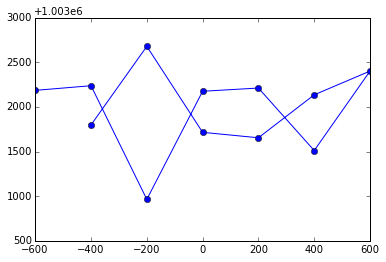

In [56]:
# connect to the keithley
sd_keithley = Keithley2400(23)

# configure the keithley
sd_keithley.setMeasure('resistance')
sd_keithley.setSourceDC('voltage', 10E-3)
sd_keithley.setCompliance('current', 1E-6)

# define some parameters
field_min = -6E2
field_max = 6E2
field_step = 200

# turn the outputs on
sd_keithley.outputOn()


field_data = []

for field in np.arange(field_min, field_max, field_step):

    # set the field
    dynacool.setField(field, 200)
    # wait for the field to stabilize
    dynacool.waitForField()
    # take a measurement
    sd_keithley.measurePoint()
    field_data.append(field)

    # do some plotting stuff
    updatingPlot(field_data, sd_keithley.data['ohms'])

# sweep back down
for field in np.arange(field_max, field_min, -field_step):

    dynacool.setField(field, 200)
    dynacool.waitForField()
    sd_keithley.measurePoint()
    field_data.append(field)

    updatingPlot(field_data, sd_keithley.data['ohms'])  

    
# turn the keithley output off
sd_keithley.outputOff();

# set the field back to 0
dynacool.setField(0,200);

In [17]:
help(dynacool)

Help on instance of Dynacool in module ppms:

class Dynacool
 |  Thin wrapper around the QuantumDesign.QDInstrument.QDInstrumentBase class
 |  
 |  Methods defined here:
 |  
 |  __init__(self, ip_address, remote=True)
 |  
 |  getField(self)
 |  
 |  getTemperature(self)
 |  
 |  setField(self, field, rate)
 |  
 |  setTemperature(self, temp, rate)
 |  
 |  waitForField(self, delay=5, timeout=600)
 |  
 |  waitForTemperature(self, delay=5, timeout=600)



## Making libraries for other instruments

... is not really that hard, actually. The basic process is:

1. find a manual for the instrument
2. look for the section that describes GPIB commands
3. write some python that sends the right GPIB commands

As an example, here's a section of the SR 830 manual:


<img src='sr830.png'>

So all we need to do is write some code that sends 'FREQ?'  or 'FREQ x' to the SR 830. Conveniently, there's already a python library that can talk to GPIB instruments.

In [62]:
from visa import GpibInstrument

sr830 = GpibInstrument("GPIB::8")

In [64]:
sr830.ask_for_values("FREQ?")

[7.726]

In [67]:
sr830.write("FREQ 7.6")

In [69]:
sr830.ask_for_values("FREQ?")

[7.6]

We can easily write a function that makes this more convenient

In [76]:
def setFreq(instrument, freq):
    instrument.write("FREQ {}".format(freq))
    
def getFreq(instrument):
    return instrument.ask_for_values('FREQ?')

setFreq(sr830, 7.7)
getFreq(sr830)

[7.7]

And finally we can combine our functions into a class to make things tidier

In [80]:
class sr830(GpibInstrument):
    
    def __init__(self, GPIBaddr):
        super(sr830, self).__init__("GPIB::%d" % GPIBaddr)
        
    def setFreq(self, freq):
        self.write("FREQ {}".format(freq))
    
    def getFreq(self):
        return self.ask_for_values('FREQ?')


sr830_instance = sr830(8)

sr830_instance.getFreq()

[7.7]